In [1]:
import sys
sys.path.append('../source')
import get_data, compute_comethylation

import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import dask.dataframe as dd
from scipy import stats

%config InlineBackend.figure_format = 'retina'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig_out_dir = "../figures/figure4"
dependency_f_dir = "../dependency_files"


/Users/zanekoch/Documents/ucsd/MutationsAndMethylationAging/notebooks/../source/compute_comethylation.py:627: SyntaxWarning: invalid escape sequence '\D'
  axes.set_ylabel('$\Delta$MF')
/Users/zanekoch/Documents/ucsd/MutationsAndMethylationAging/notebooks/../source/compute_comethylation.py:828: SyntaxWarning: invalid escape sequence '\D'
  axes[0].set_ylabel('$\Delta$MF')
/Users/zanekoch/Documents/ucsd/MutationsAndMethylationAging/notebooks/../source/compute_comethylation.py:842: SyntaxWarning: invalid escape sequence '\D'
  axes[1].set_ylabel('$\Delta$MF')
/Users/zanekoch/Documents/ucsd/MutationsAndMethylationAging/notebooks/../source/compute_comethylation.py:1539: SyntaxWarning: invalid escape sequence '\D'
  """# same but absolute cumul


# Read ICGC data

In [2]:
"""# read in illumina cpg locations
illumina_cpg_locs_df = get_data.get_illum_locs(os.path.join(dependency_f_dir, "illumina_cpg_450k_locations.csv"))

# read in icgc metadata
icgc_data_dir = "../data/icgc"
meta_fn = os.path.join(icgc_data_dir, "icgc_meta.csv")
icgc_metadata, dsest_names = get_data.get_metadata(meta_fn, is_icgc=True)

# read in mutation and methylation data (quantile normalized)
icgc_mut_w_age_df, illumina_cpg_locs_df, icgc_methyl_age_df_t, icgc_matrix_qtl_dir, icgc_covariate_fn = get_data.read_icgc_data()"""

'# read in illumina cpg locations\nillumina_cpg_locs_df = get_data.get_illum_locs(os.path.join(dependency_f_dir, "illumina_cpg_450k_locations.csv"))\n\n# read in icgc metadata\nicgc_data_dir = "../data/icgc"\nmeta_fn = os.path.join(icgc_data_dir, "icgc_meta.csv")\nicgc_metadata, dsest_names = get_data.get_metadata(meta_fn, is_icgc=True)\n\n# read in mutation and methylation data (quantile normalized)\nicgc_mut_w_age_df, illumina_cpg_locs_df, icgc_methyl_age_df_t, icgc_matrix_qtl_dir, icgc_covariate_fn = get_data.read_icgc_data()'

In [3]:
# read in methylation disturbance of icgc samples, upto 1Mb from each mutaiton
icgc_dist_mean_metrics_df = pd.read_parquet('../data/methylation_disturbance/icgc_dist_mean_metrics_1mb.parquet')
# same mean disturbance across 10kb and with annotations of genomic context, filted to for DNAVAF >=.8
icgc_dist_mean_metrics_w_annot_df_subset_vaf = pd.read_parquet('../data/methylation_disturbance/icgc_dist_mean_metrics10kDist_w_annot_subset_vaf.parquet')

# same mean disturbance across 10kb and with annotations of genomic context, but for mutations with any vaf
icgc_dist_mean_metrics_w_annot_all_vaf = pd.read_parquet('../data/methylation_disturbance/icgc_dist_mean_metrics10kDist_w_annot_all_vaf.parquet')

# create analyzeComethylation object
analyze_comethylation = compute_comethylation.analyzeComethylation()

# Figure 4a

In [4]:
icgc_dist_mean_metrics_w_annot_df = analyze_comethylation.add_mutation_info_to_mean_metrics_df(icgc_dist_mean_metrics_df, distance = -1, consortium = 'ICGC')
selected_mut_events = icgc_dist_mean_metrics_w_annot_df.query("mutated_sample == True and is_background == False and DNA_VAF >=.8")['mut_event'].unique()
icgc_dist_mean_metrics_w_annot_df_subset = icgc_dist_mean_metrics_w_annot_df.loc[
    (icgc_dist_mean_metrics_w_annot_df['index_event'].isin(selected_mut_events) | (icgc_dist_mean_metrics_w_annot_df['index_event'] == 'self') & (icgc_dist_mean_metrics_w_annot_df['is_background'] == False) & (icgc_dist_mean_metrics_w_annot_df['DNA_VAF'] >=.8))
].copy(deep = True)
#icgc_dist_mean_metrics_w_annot_df_subset.query("is_background == False and mutated_sample == True and distance == 10000")['mut_event'].nunique()

icgc_dist_mean_metrics_w_annot_df_subset['total_abs_dmf'] = icgc_dist_mean_metrics_w_annot_df_subset['median_abs_dmf'] * icgc_dist_mean_metrics_w_annot_df_subset['num_measured_sites']
icgc_dist_mean_metrics_w_annot_df_subset['total_dmf'] = icgc_dist_mean_metrics_w_annot_df_subset['median_dmf'] * icgc_dist_mean_metrics_w_annot_df_subset['num_measured_sites']

1
TtestResult(statistic=np.float64(3.4082483286592073), pvalue=np.float64(0.0006549665300876162), df=np.float64(22355.0))
10
TtestResult(statistic=np.float64(3.363666534660047), pvalue=np.float64(0.0007704346087179831), df=np.float64(22373.0))
100
TtestResult(statistic=np.float64(3.6320554055029897), pvalue=np.float64(0.0002817944504992124), df=np.float64(22606.0))
10000
TtestResult(statistic=np.float64(3.364011629553711), pvalue=np.float64(0.0007693287746863127), df=np.float64(25176.0))
1000
TtestResult(statistic=np.float64(4.076621780115252), pvalue=np.float64(4.584345705246521e-05), df=np.float64(23743.0))
5000
TtestResult(statistic=np.float64(2.888537766117754), pvalue=np.float64(0.0038736790689852577), df=np.float64(25141.0))
50000
TtestResult(statistic=np.float64(2.2396128343084487), pvalue=np.float64(0.02512466547974654), df=np.float64(25460.0))
990000
TtestResult(statistic=np.float64(0.6342998427532868), pvalue=np.float64(0.5258913744378677), df=np.float64(23345.0))
100000
Ttes

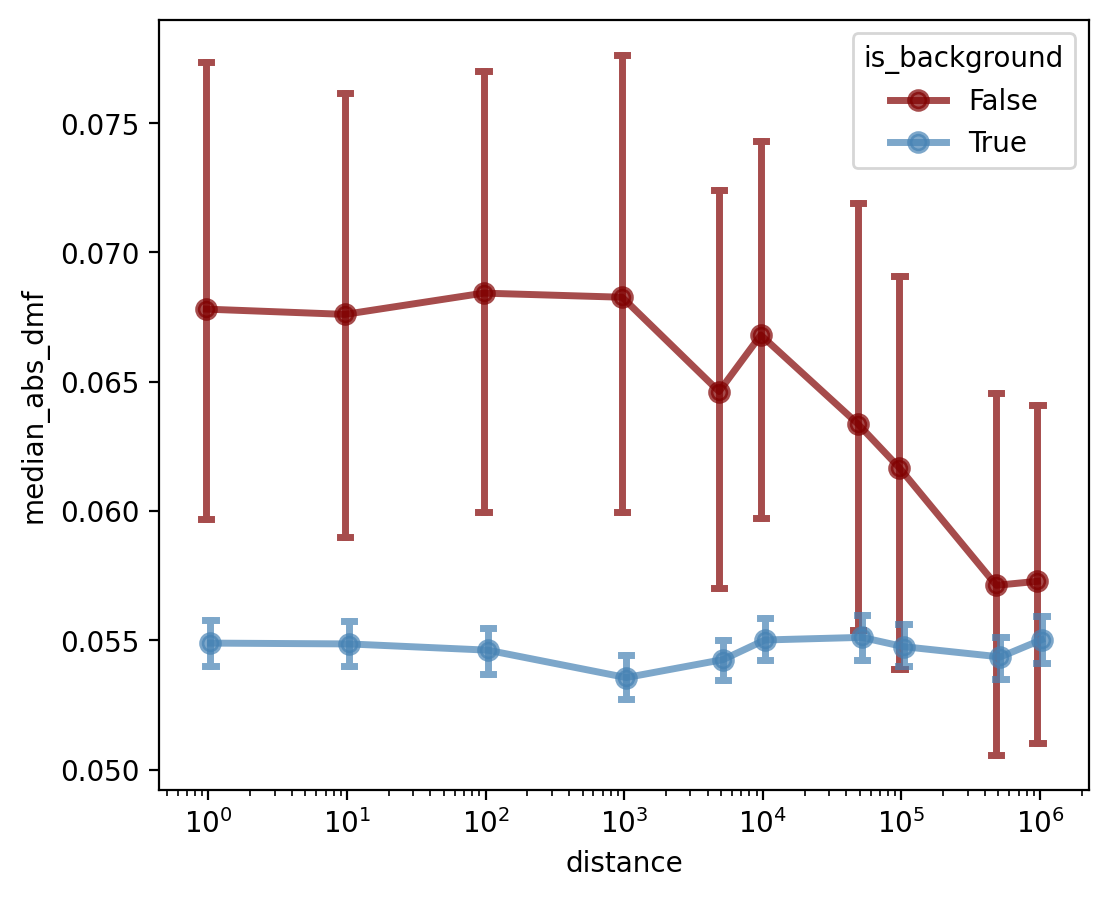

In [5]:
# 1000 bp 
fig, axes = plt.subplots(1, 1, figsize = (6, 5))
# convert to log scale
sns.pointplot(
    icgc_dist_mean_metrics_w_annot_df_subset,
    x = 'distance', hue = 'is_background', y = 'median_abs_dmf', ax = axes,
    native_scale=True, palette=['maroon', 'steelblue'], dodge=.1,
    capsize = .25, alpha=.7, log_scale=(True, False), linewidth = 2.5,
    estimator=np.mean, errorbar = 'ci',
)
for distance in icgc_dist_mean_metrics_w_annot_df_subset['distance'].unique():
    print(distance)
    # get the two groups
    group1 = icgc_dist_mean_metrics_w_annot_df_subset.query("distance == @distance and is_background == False")['median_abs_dmf']
    group2 = icgc_dist_mean_metrics_w_annot_df_subset.query("distance == @distance and is_background == True")['median_abs_dmf']
    from scipy.stats import ttest_ind
    print(ttest_ind(group1, group2))
    
plt.savefig(os.path.join(fig_out_dir, "figure4a.svg"), dpi = 300, bbox_inches = 'tight', format = 'svg')

# Figure 4b-c

/Users/zanekoch/Documents/ucsd/MutationsAndMethylationAging/notebooks/../source/compute_comethylation.py:194: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = mut.groupby(['Locus', pd.cut(mut[metric], bins)]).size().unstack(fill_value=0).T


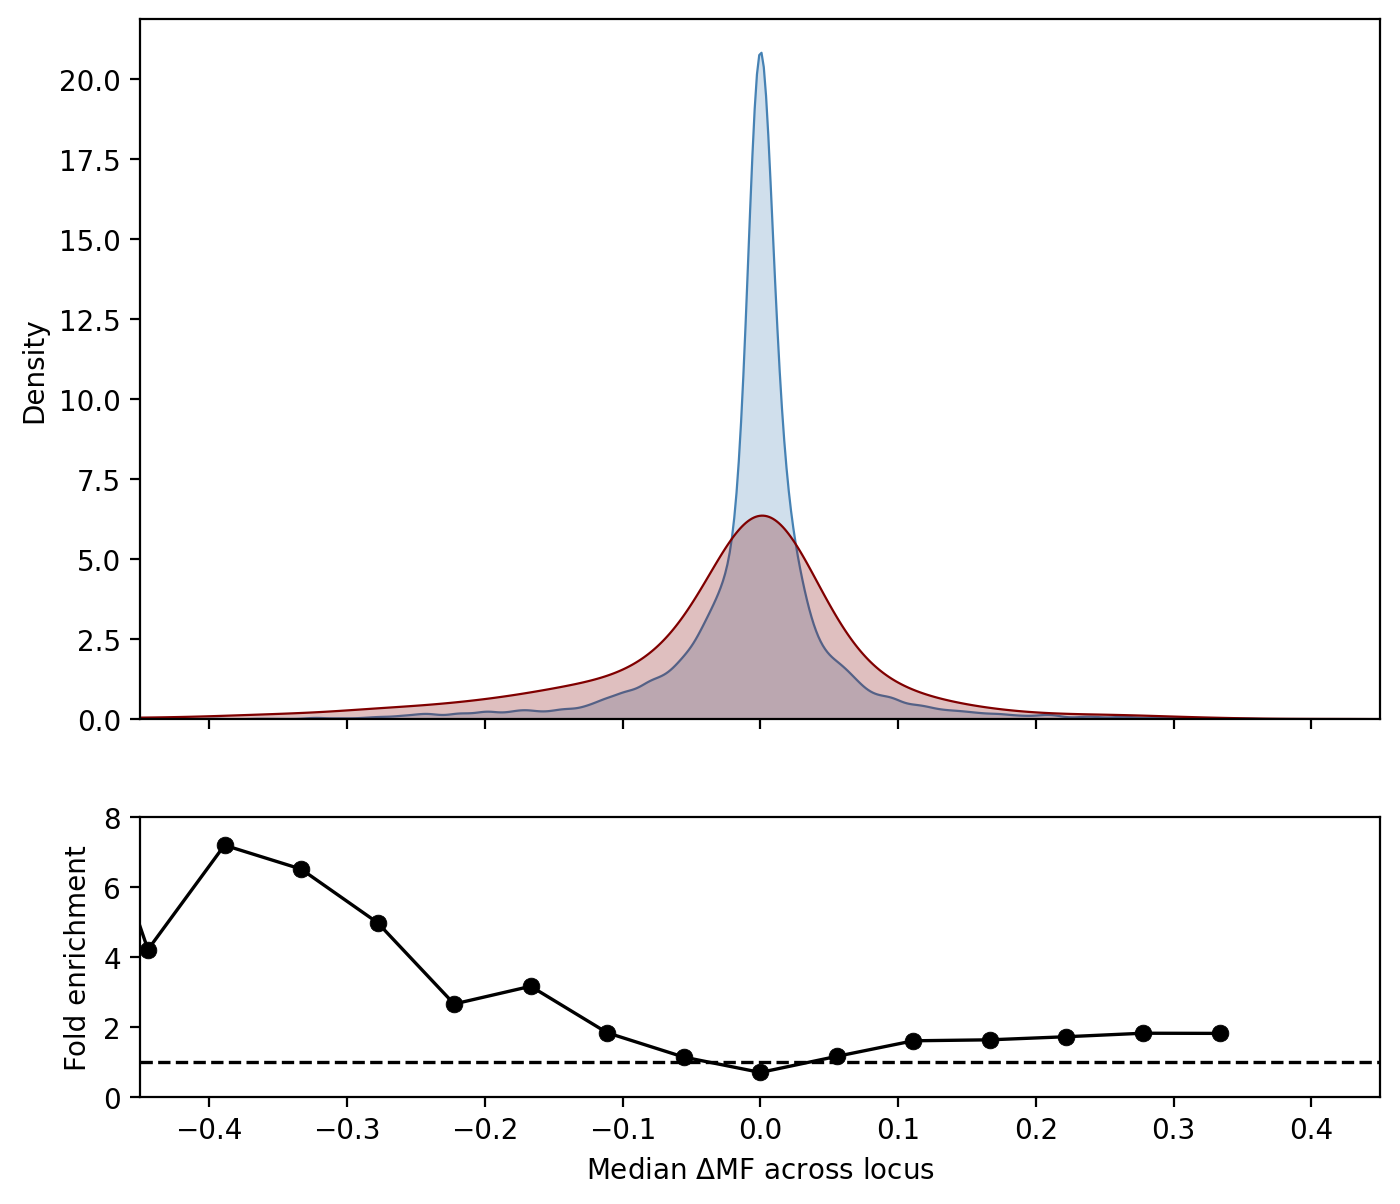

In [6]:
# make second axes bigger kw
fig, axes = plt.subplots(
    2,1, figsize = (8, 7), dpi = 100, gridspec_kw={'height_ratios': [2.5, 1]}, sharex=True
    )
###############################################################
# all
###############################################################
counts = analyze_comethylation.plot_delta_mf_kdeplot(
    icgc_dist_mean_metrics_w_annot_df_subset_vaf,
    metric = 'median_dmf', axes = axes,
    consortium = 'ICGC', out_fn = os.path.join(fig_out_dir, 'figure4b-c.svg')
    ) 

# Figure 4d

In [7]:
filtered_df = icgc_dist_mean_metrics_w_annot_df_subset_vaf.query(
    'distance == 10000 & mutated_sample == True & is_background == False'
    )

In [8]:
cgi_df = pd.read_csv('../dependency_files/CpG_islands_hg19.bed.gz', sep = '\t', header = None)
cgi_df.columns = ['chr', 'start', 'end', 'name']
cgi_df['length'] = cgi_df['end'] - cgi_df['start']
print("total number of bp in CGI: ", cgi_df['length'].sum())
print("percentage of genome in CGI: ", cgi_df['length'].sum() / 3137144693)
percent_genome_that_is_cgi = cgi_df['length'].sum() / 3137144693

# get background frequency values for CpG outside CGI, CpG inside CGI, non-CpG outside CGI, non-CpG inside CGI
genome_length = 3137144693 # UCSC
percent_genome_that_is_cgi = 0.00737030269964663 # derived from UCSC CGI file
percent_cpgs_in_cgi = 0.07 # youk et al
percent_cpgs_not_in_cgi = 0.93 # youk et al
num_cpgs = 28299634 # UCSC
bp_in_cpg = 28299634 * 2 # UCSC
basepairs_in_cgi = 23121706 # derived from UCSC CGI file
basepairs_not_in_cgi = 3137144693 - 23121706


percent_cgi_that_is_cpg = (bp_in_cpg * percent_cpgs_in_cgi)/(basepairs_in_cgi)# the percent of CG
percent_non_cgi_that_is_cpg = (bp_in_cpg * percent_cpgs_not_in_cgi)/(basepairs_not_in_cgi)

percent_cpg_not_cgi = percent_non_cgi_that_is_cpg * (1 - percent_genome_that_is_cgi)
percent_cpg_and_cgi = percent_cgi_that_is_cpg * percent_genome_that_is_cgi

percent_non_cpg_not_cgi = (1 - percent_non_cgi_that_is_cpg) * (1 - percent_genome_that_is_cgi)
percent_non_cpg_and_cgi = (1 - percent_cgi_that_is_cpg) * percent_genome_that_is_cgi

filtered_df = icgc_dist_mean_metrics_w_annot_df_subset_vaf.query(
    'distance == 10000 & mutated_sample == True & is_background == False'
    )
# drop duplicate mut_events
filtered_df = filtered_df.drop_duplicates(subset=['mut_event'])
# sort them in order of median_dmf
sorted_df = filtered_df.sort_values(by='median_dmf', ascending=False)
# get top and bottom 1000 events, which is about 25%
num_top_muts = 1000 # 25%
neg_indices = sorted_df.index[-num_top_muts:]
pos_indices = sorted_df.index[:num_top_muts]
# create a new df to plot
top_df = sorted_df.loc[pos_indices]
top_df['Methylation change'] = 'Gain'
bottom_df = sorted_df.loc[neg_indices]
bottom_df['Methylation change'] = 'Loss'
y_proportions = {
    "CpG outside CGI": np.array([
        top_df.query("is_cgi == False and was_cpg == True").shape[0] / top_df.shape[0], 
        bottom_df.query("is_cgi == False and was_cpg == True").shape[0] / bottom_df.shape[0]
        ]),
    "CpG in CGI": np.array([
        top_df.query("is_cgi == True and was_cpg == True").shape[0] / top_df.shape[0],
        bottom_df.query("is_cgi == True and was_cpg == True").shape[0] / bottom_df.shape[0]
        ]),
    "non-CpG outside CGI": np.array([
        top_df.query("is_cgi == False and was_cpg == False").shape[0] / top_df.shape[0],
        bottom_df.query("is_cgi == False and was_cpg == False").shape[0] / bottom_df.shape[0]
        ]),
    "non-CpG in CGI": np.array([
        top_df.query("is_cgi == True and was_cpg == False").shape[0] / top_df.shape[0],
        bottom_df.query("is_cgi == True and was_cpg == False").shape[0] / bottom_df.shape[0]
        ]),
}
y_counts = {
    "CpG outside CGI": np.array([
        top_df.query("is_cgi == False and was_cpg == True").shape[0], 
        bottom_df.query("is_cgi == False and was_cpg == True").shape[0]
        ]),
    "CpG in CGI": np.array([
        top_df.query("is_cgi == True and was_cpg == True").shape[0],
        bottom_df.query("is_cgi == True and was_cpg == True").shape[0]
        ]),
    "non-CpG outside CGI": np.array([
        top_df.query("is_cgi == False and was_cpg == False").shape[0],
        bottom_df.query("is_cgi == False and was_cpg == False").shape[0]
        ]),
    "non-CpG in CGI": np.array([
        top_df.query("is_cgi == True and was_cpg == False").shape[0],
        bottom_df.query("is_cgi == True and was_cpg == False").shape[0]
        ]),
}


enrichments = {}
enrichments['CpG outside CGI'] = y_proportions['CpG outside CGI'] / percent_cpg_not_cgi
enrichments['CpG in CGI'] = y_proportions['CpG in CGI'] / percent_cpg_and_cgi
enrichments['non-CpG outside CGI'] = y_proportions['non-CpG outside CGI'] / percent_non_cpg_not_cgi
enrichments['non-CpG in CGI'] = y_proportions['non-CpG in CGI'] / percent_non_cpg_and_cgi
# create df
enrichments_df = pd.DataFrame(enrichments)
# stack
enrichments_df = enrichments_df.stack().reset_index()
# rename
enrichments_df.columns = ['Methylation change direction', 'Functional region', 'Fold-enrichment']
# map Methylation change direction 0 to Gain and 1 to Loss
enrichments_df['Methylation change direction'] = enrichments_df['Methylation change direction'].map({0: 'Gain', 1: 'Loss'})

total number of bp in CGI:  23121706
percentage of genome in CGI:  0.00737030269964663


/var/folders/xr/d_82j7h942xgvyqjprbpncg80000gn/T/ipykernel_11980/2022261032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xr/d_82j7h942xgvyqjprbpncg80000gn/T/ipykernel_11980/2022261032.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xr/d_82j7h942xgvyqjprbpncg80000gn/T/ipykernel_11980/2022261032.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend().set_visible(False)


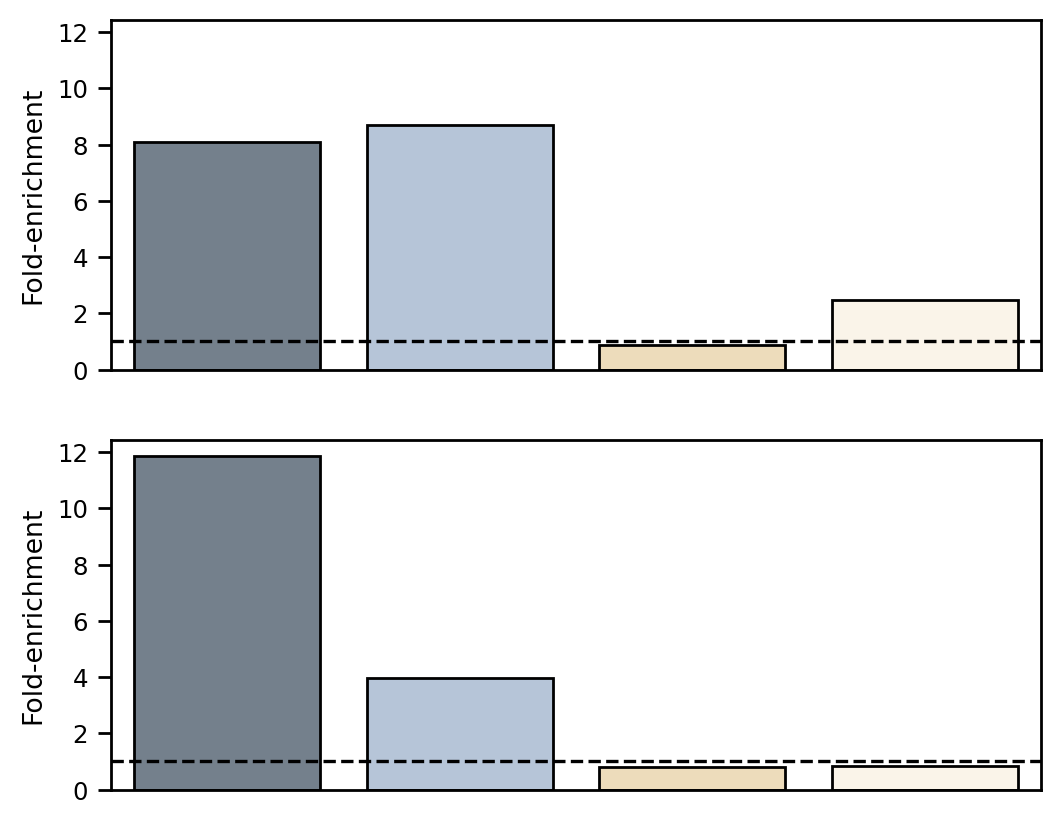

In [9]:
# plot enrichments as barplot
fig, axes = plt.subplots(2, 1, figsize=(6, 5), dpi = 100, sharex='col', sharey='col')
sns.set_context('paper')
sns.barplot(
    data=enrichments_df[enrichments_df['Methylation change direction'] == 'Gain'], y='Fold-enrichment', x='Functional region',
    #hue_order = [ 'CpG in CGI', 'non-CpG in CGI','CpG outside CGI', 'non-CpG outside CGI', ],
    palette=['slategray', 'lightsteelblue', 'wheat', 'oldlace'],
    edgecolor='black', linewidth=1,
    ax=axes[0]
)
axes[0].set_xlabel('')
sns.barplot(
    data=enrichments_df[enrichments_df['Methylation change direction'] == 'Loss'], y='Fold-enrichment', x='Functional region',
    #hue_order = [ 'CpG in CGI', 'non-CpG in CGI','CpG outside CGI', 'non-CpG outside CGI', ],
    palette=['slategray', 'lightsteelblue', 'wheat', 'oldlace'],
    edgecolor='black', linewidth=1,
    ax=axes[1]
)
axes[1].set_xlabel('')
# turn off legend
axes[0].legend().set_visible(False)
# plot dashed line at y = 1
axes[0].axhline(1, ls='--', color='black')
axes[1].axhline(1, ls='--', color='black')
# remove x ticks and labels
axes[0].set_xticklabels([])
axes[1].set_xticks([])
# remove y axes labels
# set super y axis label
plt.savefig(os.path.join(fig_out_dir, 'figure4d.svg'), dpi = 300, format = 'svg')

# Figure 4e

/var/folders/xr/d_82j7h942xgvyqjprbpncg80000gn/T/ipykernel_11980/453736419.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


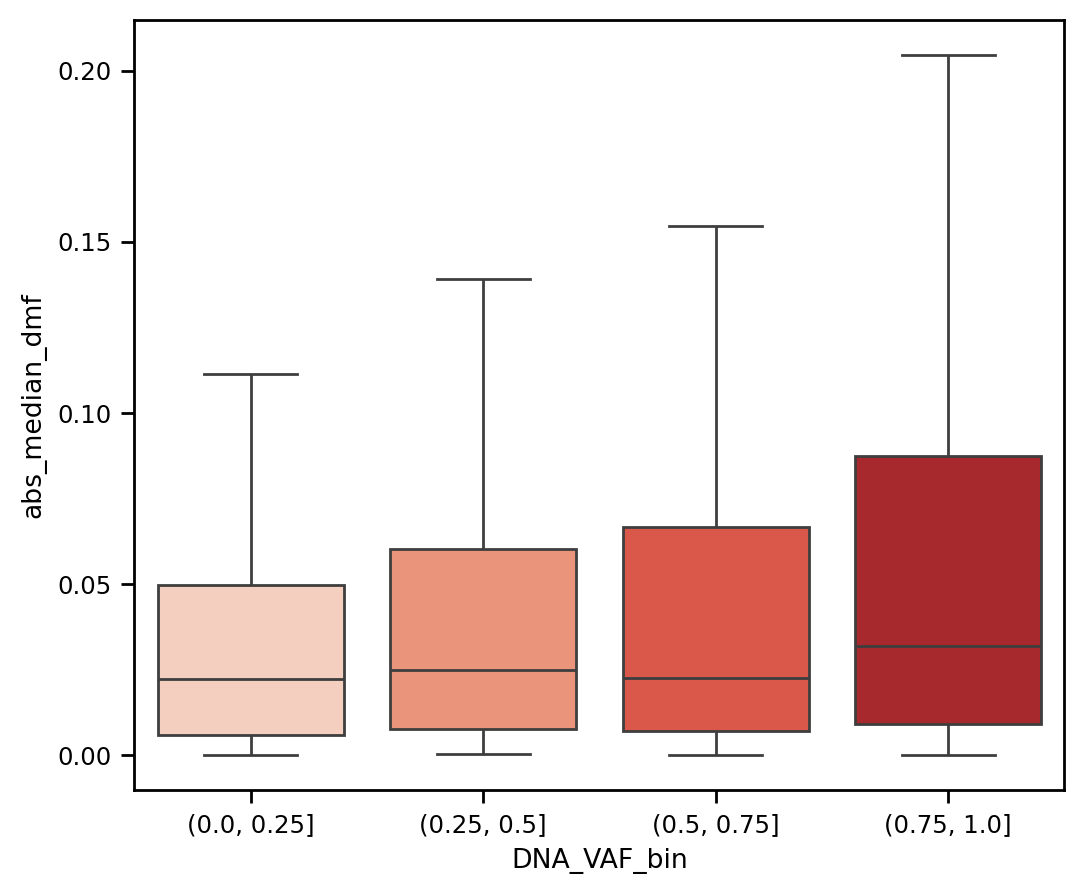

In [11]:
filtered_df = icgc_dist_mean_metrics_w_annot_all_vaf.query(
    'distance == 10000 & mutated_sample == True & is_background == False'
    )
# drop duplicate mut_events
filtered_df = filtered_df.drop_duplicates(subset=['mut_event'])
# get absolute value of median dmf
filtered_df['abs_median_dmf'] = filtered_df['median_dmf'].abs()
# bin by DNA VAF
filtered_df['DNA_VAF_bin'] = pd.cut(
    filtered_df['DNA_VAF'],
    bins = pd.IntervalIndex.from_tuples([(0,.25), (.25, .5), (.5, .75), (.75, 1)])
        #[(0, .2), (.2, .4), (.4, .6), (.6, .8), (.8, 1)])
    )

fig, axes = plt.subplots(figsize = (6,5), dpi = 100)
sns.set_context('paper')

# boxplot
sns.boxplot(
    data=filtered_df.query("is_background == False"),
    x='DNA_VAF_bin', y='abs_median_dmf', showfliers=False, palette = 'Reds',
    ax = axes
    )

plt.savefig(os.path.join(fig_out_dir, 'figure4e.svg'), dpi = 300, format = 'svg')